# ObjectBox 4.0 Python City Example

This Jupyter Notebook demonstrates ObjectBox 4.0 using City data.

*   Create the data model class, and the database
*   Insert data
*   Create a simple query
*   Create a nearest neighbor vector search

For more information on the 4.0 release and details on this first on-device vector database and its possibilities see our [blog post](https://objectbox.io/the-first-on-device-vector-database-objectbox-4-0).


## First, install the latest version of ObjectBox

In [1]:
!pip install --upgrade objectbox

## Create the ObjectBox data model

We define a `City` class with its properties (name and location and an ID).

*Note:* The `HnswIndex` is a special index for vectors that enables high-performance vector search.

In [2]:
from objectbox import Entity, Float32Vector, HnswIndex, Id, Store, String

@Entity()
class City:
    id = Id()
    name = String()
    location = Float32Vector(index=HnswIndex(dimensions=2))

## Create the ObjectBox `Store` and `Box`

The `Store` is a database instance. From the `Strore` we prepare a `Box` to interact with `City` objects:

In [3]:
store = Store()
box = store.box(City)

## A list of capital cities (no database interaction yet)

In [4]:
def city(name, lat, lon):
    return City(name=name, location=[lat,lon])

cities = [
    city("Abuja", 9.0765, 7.3986),
    city("Accra", 5.6037, -0.1870),
    city("Addis Ababa", 9.0084, 38.7813),
    city("Algiers", 36.7529, 3.0420),
    city("Amman", 31.9632, 35.9306),
    city("Amsterdam", 52.3667, 4.8945),
    city("Ankara", 39.9334, 32.8597),
    city("Antananarivo", -18.8792, 47.5079),
    city("Apia", -13.8330, -171.7667),
    city("Ashgabat", 37.9601, 58.3261),
    city("Asmara", 15.3229, 38.9251),
    city("Astana", 51.1796, 71.4475),
    city("Asunción", -25.2637, -57.5759),
    city("Athens", 37.9795, 23.7162),
    city("Avarua", -21.2079, -159.7750),
    city("Baghdad", 33.3152, 44.3661),
    city("Baku", 40.4093, 49.8671),
    city("Bamako", 12.6530, -7.9864),
    city("Bandar Seri Begawan", 4.9031, 114.9398),
    city("Bangkok", 13.7563, 100.5018),
    city("Bangui", 4.3947, 18.5582),
    city("Banjul", 13.4549, -16.5790),
    city("Basseterre", 17.3026, -62.7177),
    city("Beijing", 39.9042, 116.4074),
    city("Beirut", 33.8889, 35.4944),
    city("Belgrade", 44.7866, 20.4489),
    city("Belmopan", 17.2510, -88.7590),
    city("Berlin", 52.5200, 13.4050),
    city("Bern", 46.9480, 7.4474),
    city("Bishkek", 42.8746, 74.5698),
    city("Bissau", 11.8636, -15.5842),
    city("Bogotá", 4.7109, -74.0721),
    city("Brasília", -15.8267, -47.9218),
    city("Bratislava", 48.1486, 17.1077),
    city("Brazzaville", -4.2634, 15.2429),
    city("Bridgetown", 13.1132, -59.5988),
    city("Brussels", 50.8503, 4.3517),
    city("Bucharest", 44.4268, 26.1025),
    city("Budapest", 47.4979, 19.0402),
    city("Buenos Aires", -34.6037, -58.3816),
    city("Bujumbura", -3.3818, 29.3622),
    city("Cairo", 30.0444, 31.2357),
    city("Canberra", -35.2809, 149.1300),
    city("Caracas", 10.4806, -66.9036),
    city("Castries", 14.0101, -60.9874),
    city("Chisinau", 47.0105, 28.8638),
    city("Colombo", 6.9271, 79.8612),
    city("Conakry", 9.6412, -13.5784),
    city("Copenhagen", 55.6761, 12.5683),
    city("Dakar", 14.7167, -17.4677),
    city("Damascus", 33.5131, 36.2919),
    city("Dhaka", 23.8103, 90.4125),
    city("Dili", -8.5569, 125.5603),
    city("Djibouti", 11.5890, 43.1456),
    city("Dodoma", -6.1748, 35.7469),
    city("Doha", 25.2854, 51.5310),
    city("Dublin", 53.3498, -6.2603),
    city("Dushanbe", 38.5868, 68.7841),
    city("Freetown", 8.4840, -13.2299),
    city("Funafuti", -8.5210, 179.1962),
    city("Gaborone", -24.6282, 25.9231),
    city("Georgetown", 6.8013, -58.1550),
    city("Gibraltar", 36.1408, -5.3536),
    city("Guatemala City", 14.6349, -90.5069),
    city("Hanoi", 21.0278, 105.8342),
    city("Harare", -17.8252, 31.0335),
    city("Havana", 23.1136, -82.3666),
    city("Helsinki", 60.1699, 24.9384),
    city("Honiara", -9.4376, 159.9720),
    city("Islamabad", 33.6844, 73.0479),
    city("Jakarta", -6.2088, 106.8456),
    city("Juba", 4.8594, 31.5713),
    city("Kabul", 34.5553, 69.2075),
    city("Kampala", 0.3476, 32.5825),
    city("Kathmandu", 27.7172, 85.3240),
    city("Khartoum", 15.5007, 32.5599),
    city("Kiev", 50.4501, 30.5234),
    city("Kigali", -1.9441, 30.0619),
    city("Kingston", 17.9710, -76.7924),
    city("Kingstown", 13.1467, -61.2121),
    city("Kinshasa", -4.4419, 15.2663),
    city("Kuala Lumpur", 3.1390, 101.6869),
    city("Kuwait City", 29.3759, 47.9774),
    city("La Paz", -16.4897, -68.1193),
    city("Libreville", 0.4162, 9.4673),
    city("Lilongwe", -13.9626, 33.7741),
    city("Lima", -12.0464, -77.0428),
    city("Lisbon", 38.7223, -9.1393),
    city("Ljubljana", 46.0569, 14.5058),
    city("Lomé", 6.1319, 1.2228),
    city("London", 51.5072, -0.1276),
    city("Luanda", -8.8399, 13.2894),
    city("Lusaka", -15.3875, 28.3228),
    city("Luxembourg City", 49.6116, 6.1319),
    city("Madrid", 40.4168, -3.7038),
    city("Majuro", 7.1164, 171.1859),
    city("Malabo", 3.7508, 8.7839),
    city("Male", 4.1755, 73.5093),
    city("Mamoudzou", -12.7871, 45.2750),
    city("Managua", 12.1364, -86.2514),
    city("Manama", 26.2285, 50.5860),
    city("Manila", 14.5995, 120.9842),
    city("Maputo", -25.8918, 32.6051),
    city("Maseru", -29.2976, 27.4854),
    city("Mbabane", -26.3054, 31.1367),
    city("Melekeok", 7.4874, 134.6265),
    city("Mexico City", 19.4326, -99.1332),
    city("Minsk", 53.9045, 27.5615),
    city("Mogadishu", 2.0469, 45.3182),
    city("Monaco", 43.7325, 7.4189),
    city("Monrovia", 6.3005, -10.7974),
    city("Montevideo", -34.9011, -56.1645),
    city("Moroni", -11.7022, 43.2551),
    city("Moscow", 55.7558, 37.6173),
    city("Muscat", 23.5859, 58.4059),
    city("Nairobi", -1.2921, 36.8219),
    city("Nassau", 25.0478, -77.3554),
    city("Naypyidaw", 19.7633, 96.0785),
    city("New Delhi", 28.6139, 77.2090),
    city("Ngerulmud", 7.5004, 134.6249),
    city("Niamey", 13.5122, 2.1254),
    city("Nicosia", 35.1725, 33.365),
    city("Nicosia Northern Cyprus", 35.19, 33.363611),
    city("Nouakchott", 18.0735, -15.9582),
    city("Nuku'alofa", -21.1393, -175.2049),
    city("Nuuk", 64.1836, -51.7214),
    city("Oranjestad", 12.5092, -70.0086),
    city("Oslo", 59.9139, 10.7522),
    city("Ottawa", 45.4215, -75.6972),
    city("Ouagadougou", 12.3714, -1.5197),
    city("Pago Pago", -14.2794, -170.7004),
    city("Palikir", 6.9248, 158.1614),
    city("Panama City", 8.9824, -79.5199),
    city("Papeete", -17.5350, -149.5699),
    city("Paramaribo", 5.8520, -55.2038),
    city("Paris", 48.8566, 2.3522),
    city("Philipsburg", 18.0255, -63.0450),
    city("Phnom Penh", 11.5564, 104.9282),
    city("Plymouth", 16.7056, -62.2126),
    city("Podgorica", 42.4304, 19.2594),
    city("Port Louis", -20.1619, 57.4989),
    city("Port Moresby", -9.4438, 147.1803),
    city("Port Vila", -17.7416, 168.3213),
    city("Port-au-Prince", 18.5944, -72.3074),
    city("Port of Spain", 10.6596, -61.4789),
    city("Porto-Novo", 6.4968, 2.6283),
    city("Prague", 50.0755, 14.4378),
    city("Praia", 14.9195, -23.5087),
    city("Pretoria", -25.7463, 28.1876),
    city("Pristina", 42.6629, 21.1655),
    city("Pyongyang", 39.0392, 125.7625),
    city("Quito", -0.1807, -78.4678),
    city("Rabat", 33.9693, -6.9275),
    city("Reykjavik", 64.1466, -21.9426),
    city("Riga", 56.9496, 24.1052),
    city("Riyadh", 24.7136, 46.6753),
    city("Road Town", 18.4207, -64.6399),
    city("Rome", 41.9028, 12.4964),
    city("Roseau", 15.3092, -61.3794),
    city("Saipan", 15.1833, 145.7500),
    city("San José", 9.9281, -84.0907),
    city("San Juan", 18.4655, -66.1057),
    city("San Marino", 43.9424, 12.4578),
    city("San Salvador", 13.6929, -89.2182),
    city("Sana'a", 15.3694, 44.1910),
    city("Santiago", -33.4489, -70.6693),
    city("Santo Domingo", 18.4861, -69.9312),
    city("Sarajevo", 43.8564, 18.4131),
    city("Seoul", 37.5665, 126.9780),
    city("Singapore", 1.3521, 103.8198),
    city("Skopje", 41.9973, 21.4279),
    city("Sofia", 42.6975, 23.3241),
    city("Sri Jayawardenepura Kotte", 6.8928, 79.9277),
    city("St. George's", 12.0561, -61.7485),
    city("St. Helier", 49.1839, -2.1064),
    city("St. John's", 17.1171, -61.8456),
    city("St. Peter Port", 49.4599, -2.5352),
    city("Stanley", -51.7020, -57.8517),
    city("Stockholm", 59.3293, 18.0686),
    city("Sucre", -19.0421, -65.2559),
    city("Sukhumi", 43.0004, 41.0234),
    city("Suva", -18.1416, 178.4419),
    city("Taipei", 25.0330, 121.5654),
    city("Tallinn", 59.4370, 24.7536),
    city("Tarawa", 1.4170, 173.0000),
    city("Tashkent", 41.2995, 69.2401),
    city("Tbilisi", 41.7151, 44.8271),
    city("Tegucigalpa", 14.0818, -87.2068),
    city("Tehran", 35.6892, 51.3890),
    city("Thimphu", 27.4728, 89.6390),
    city("Tirana", 41.3275, 19.8187),
    city("Tokyo", 35.6762, 139.6503),
    city("Tripoli", 32.8867, 13.1910),
    city("Tunis", 36.8065, 10.1815),
    city("Ulaanbaatar", 47.8864, 106.9057),
    city("Vaduz", 47.1410, 9.5215),
    city("Valletta", 35.9042, 14.5189),
    city("Vatican City", 41.9029, 12.4534),
    city("Victoria", -4.6182, 55.4515),
    city("Vienna", 48.2082, 16.3738),
    city("Vientiane", 17.9757, 102.6331),
    city("Vilnius", 54.6872, 25.2797),
    city("Warsaw", 52.2297, 21.0122),
    city("Washington, D.C.", 38.9072, -77.0369),
    city("Wellington", -41.2865, 174.7762),
    city("West Island", -12.1880, 96.8292),
    city("Willemstad", 12.1091, -68.9319),
    city("Windhoek", -22.5749, 17.0805),
    city("Yamoussoukro", 6.8276, -5.2893),
    city("Yaoundé", 3.8480, 11.5021),
    city("Yaren", -0.5467, 166.9209),
    city("Yerevan", 40.1872, 44.5152),
    city("Zagreb", 45.8150, 15.9819)
]



## Put `City` objects into the Database

Now, that we have our list of City object, we can `put` them in the database. Note that we also call `remove_all()` to make this step repeatable:


In [5]:
box.remove_all()  # Remove previous data (if any) to avoid duplicates
box.put(*cities)
print("Cities in the database:", box.count())

Cities in the database: 213


## A simple Query

To demonstrate a simple query, let's list all Cities starting with "Be":

In [6]:
query = box.query(City.name.starts_with("Be")).build()
results = query.find()
print(f"Found {len(results)} objects")
for city in results:
  print(f"{city.name:>10s} {city.location}")


Found 6 objects
   Beijing [ 39.9042 116.4074]
    Beirut [33.8889 35.4944]
  Belgrade [44.7866 20.4489]
  Belmopan [ 17.251 -88.759]
    Berlin [52.52  13.405]
      Bern [46.948   7.4474]


##Nearest-neighbor Vector Search

OK, now let's perform a *nearest-neighbor* search! List the 15 nearest cities closest to a given query location:

In [7]:
query_location = [51.0, 12.0] # Somewhere in Germany, south-west of Berlin

query = box.query(City.location.nearest_neighbor(query_location, 15)).build()
results = query.find_with_scores()

print(f"Found {len(results)} objects")
for i, result in enumerate(results):
    capital, score = result
    print(f"{i + 1}. Capital: {capital.name}, Score: {score}")


Found 15 objects
1. Capital: Berlin, Score: 4.284425735473633
2. Capital: Prague, Score: 6.79757022857666
3. Capital: Vaduz, Score: 21.034852981567383
4. Capital: Copenhagen, Score: 22.188892364501953
5. Capital: Vienna, Score: 26.924283981323242
6. Capital: Ljubljana, Score: 30.713272094726562
7. Capital: Bratislava, Score: 34.21907424926758
8. Capital: Luxembourg City, Score: 36.36225891113281
9. Capital: Bern, Score: 37.14485549926758
10. Capital: Zagreb, Score: 42.739768981933594
11. Capital: San Marino, Score: 50.01927185058594
12. Capital: Amsterdam, Score: 52.35599899291992
13. Capital: Brussels, Score: 58.51890563964844
14. Capital: Budapest, Score: 61.829124450683594
15. Capital: Monaco, Score: 73.80305480957031


##Visualize the results

And finally, let's visualize an the search result using the matplotlib:

In [8]:
!pip install matplotlib

The search results (aka the nearest neighbors) are the blue dots and the search location is the red dot:

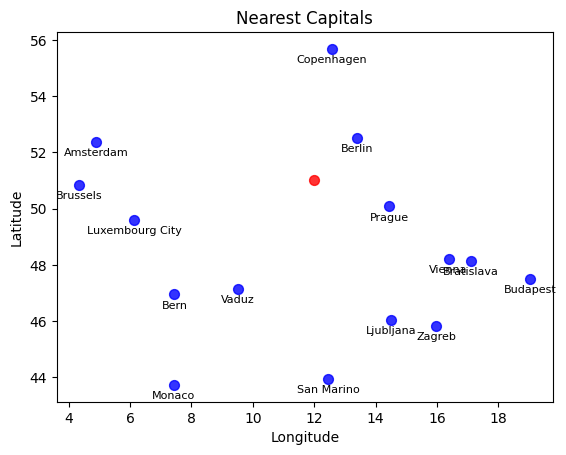

In [9]:
import matplotlib.pyplot as plt

for result in results:
    city = result[0]
    lat = city.location[0]
    lon = city.location[1]
    plt.scatter(lon, lat, color='blue', s=50, alpha=0.8)
    plt.annotate(city.name, (lon, lat), textcoords="offset points",
                 xytext=(0, -10), ha='center', fontsize=8)

plt.scatter(query_location[1], query_location[0], color='red', s=50, alpha=0.8)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Nearest Capitals')

plt.show()


## Closing remarks

Typically, you can leave the Store open while your application runs and never close it. However, for this Jupyter Notebook, we also include a close so you can start from scratch with opening the store again. This avoids opening the same store multiple times.

In [10]:
# Uncomment this to close the store, if you want to open it again:
# store.close()